!pip install scikit-learn

In [6]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

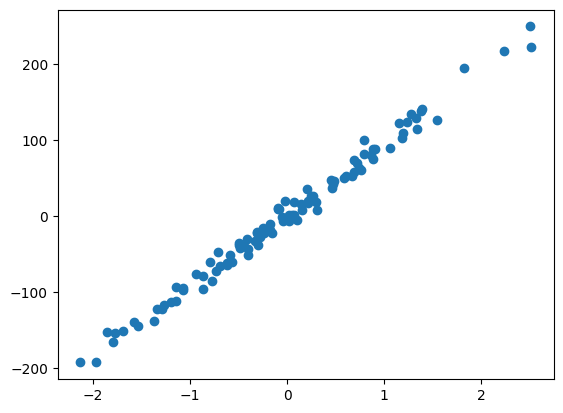

In [9]:
x,y = make_regression(n_samples= 100, n_features= 1, noise= 10)
plt.scatter(x,y)

In [12]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [17]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [18]:
theta = np.random.randn(2,1)
theta

array([[0.75957738],
       [0.55588887]])

# modele

In [19]:
def model(X, theta):
    return X.dot(theta)

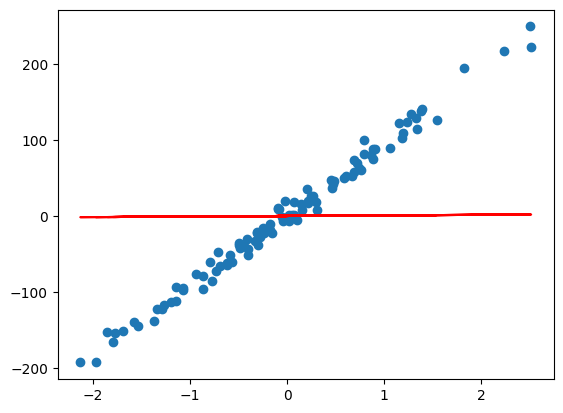

In [25]:
plt.scatter(x,y)
plt.plot(x,model(X, theta), c='r')

# fonction cout

In [26]:
def cost_function(x,y,theta):
    m=len(y)
    return 1/2*m * np.sum((model(X,theta)-y)**2)

In [28]:
cost_function(X,y,theta)

np.float64(41770123.7227421)

# Gradients et Descente de Gradient

In [37]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [48]:
def grad_descent(X,y, theta, learning_rate, n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [49]:
theta_final, cost_history= grad_descent(X,y, theta, learning_rate=0.01, n_iterations=1000)

In [50]:
theta_final

array([[93.30284934],
       [ 2.02977933]])

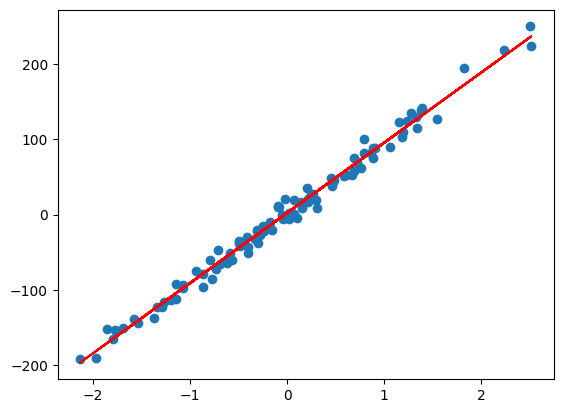

In [51]:
predictions= model(X, theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

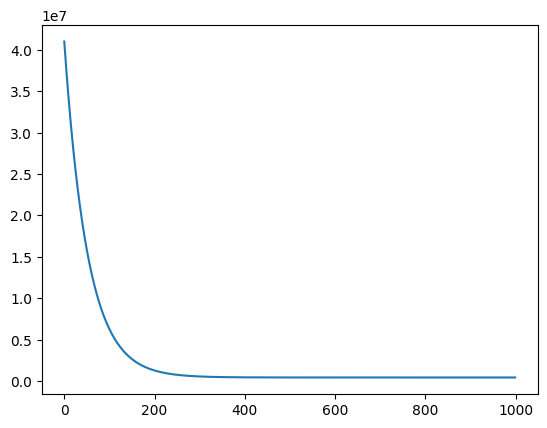

In [52]:
plt.plot(range(1000), cost_history)

In [53]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1-u/v

In [56]:
coef_determination(y, predictions)

np.float64(0.9888257551905989)